In [1]:
import numpy as np
import pandas as pd
import nltk
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

In [2]:
df = pd.read_csv('netflix_reviews.csv')

df.drop(columns = ['reviewId', 'userName', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'appVersion'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117292 entries, 0 to 117291
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  117290 non-null  object
 1   score    117292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [3]:
df[df['content'].isnull()]

,content,score
7608,NaN,5
7959,NaN,2


In [4]:
df = df[~df['content'].isnull()]

In [5]:
df

,content,score
0,This App Not Supporting My Device ROG3 Mobile!...,1
1,"I'm getting very tired, you guys keep logging ...",2
2,One of my go to channels..l was at least 4 mov...,5
3,"Poor scripts, Violent content",2
4,Good,3
...,...,...
117287,i really like it! there are so many movies and...,5
117288,I love Netflix. I always enjoy my time using it.,5
117289,Sound quality is very slow of movies,1
117290,Rate is very expensive.. bcos we see netflix s...,1


In [6]:
import re

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df['cleaned_content'] = df['content'].apply(preprocess_text)

In [7]:
df

,content,score,cleaned_content
0,This App Not Supporting My Device ROG3 Mobile!...,1,this app not supporting my device rog mobile k...
1,"I'm getting very tired, you guys keep logging ...",2,im getting very tired you guys keep logging me...
2,One of my go to channels..l was at least 4 mov...,5,one of my go to channelsl was at least movies...
3,"Poor scripts, Violent content",2,poor scripts violent content
4,Good,3,good
...,...,...,...
117287,i really like it! there are so many movies and...,5,i really like it there are so many movies and ...
117288,I love Netflix. I always enjoy my time using it.,5,i love netflix i always enjoy my time using it
117289,Sound quality is very slow of movies,1,sound quality is very slow of movies
117290,Rate is very expensive.. bcos we see netflix s...,1,rate is very expensive bcos we see netflix sun...


In [8]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [9]:
df['sentiment'] = df['cleaned_content'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

In [10]:
df

,content,score,cleaned_content,sentiment,sentiment_label
0,This App Not Supporting My Device ROG3 Mobile!...,1,this app not supporting my device rog mobile k...,0.225,positive
1,"I'm getting very tired, you guys keep logging ...",2,im getting very tired you guys keep logging me...,-0.194,negative
2,One of my go to channels..l was at least 4 mov...,5,one of my go to channelsl was at least movies...,0.100,neutral
3,"Poor scripts, Violent content",2,poor scripts violent content,-0.600,negative
4,Good,3,good,0.700,positive
...,...,...,...,...,...
117287,i really like it! there are so many movies and...,5,i really like it there are so many movies and ...,0.350,positive
117288,I love Netflix. I always enjoy my time using it.,5,i love netflix i always enjoy my time using it,0.450,positive
117289,Sound quality is very slow of movies,1,sound quality is very slow of movies,0.005,neutral
117290,Rate is very expensive.. bcos we see netflix s...,1,rate is very expensive bcos we see netflix sun...,-0.325,negative


In [11]:
df[['cleaned_content', 'score', 'sentiment_label']]

,cleaned_content,score,sentiment_label
0,this app not supporting my device rog mobile k...,1,positive
1,im getting very tired you guys keep logging me...,2,negative
2,one of my go to channelsl was at least movies...,5,neutral
3,poor scripts violent content,2,negative
4,good,3,positive
...,...,...,...
117287,i really like it there are so many movies and ...,5,positive
117288,i love netflix i always enjoy my time using it,5,positive
117289,sound quality is very slow of movies,1,neutral
117290,rate is very expensive bcos we see netflix sun...,1,negative


In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

In [15]:
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['cleaned_content'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

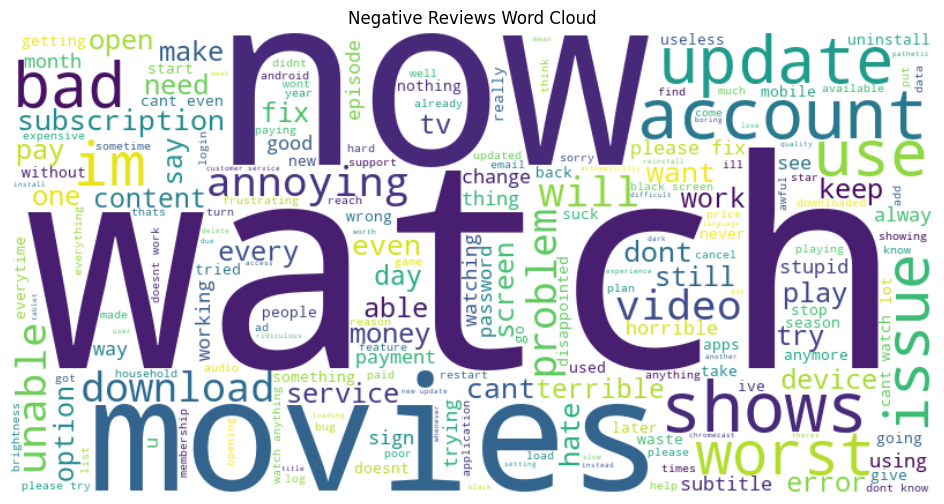

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()